In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
from glob import glob
from matplotlib import pyplot as plt
from pymea import plotting
from pymea import matlab_compatibility as mc
from datetime import datetime

In [3]:
data_path_1 = '/home/sean/mea data/01/01_spk_freq_table.csv'
data_table_1 = pd.read_csv(data_path_1)
time_vector_1 = data_table_1['time'].map(mc.datetime_str_to_datetime)
data_path_2 = '/home/sean/mea data/01/01_spk_freq_table_2.csv'
data_table_2 = pd.read_csv(data_path_2)
time_vector_2 = data_table_2['time'].map(mc.datetime_str_to_datetime)
data_path_3 = '/home/sean/mea data/01/01_spk_freq_table_080317.csv'
data_table_3 = pd.read_csv(data_path_3)
time_vector_3 = data_table_3['time'].map(mc.datetime_str_to_datetime)

In [4]:
data_path_1_ns = '/home/sean/mea data/01/01_spk_freq_table_nosort_072717.csv'
data_table_1_ns = pd.read_csv(data_path_1_ns)
time_vector_1_ns = data_table_1['time'].map(mc.datetime_str_to_datetime)
data_path_2_ns = '/home/sean/mea data/01/01_spk_freq_table_nosort_080117.csv'
data_table_2_ns = pd.read_csv(data_path_2_ns)
time_vector_2_ns = data_table_2['time'].map(mc.datetime_str_to_datetime)
data_path_3_ns = '/home/sean/mea data/01/01_spk_freq_table_nosort_080317.csv'
data_table_3_ns = pd.read_csv(data_path_3_ns)
time_vector_3_ns = data_table_3['time'].map(mc.datetime_str_to_datetime)

In [4]:
def is_early_top(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row <= 3 and col <= 4:
        return 1
    else:
        return False
    
def is_early_bottom(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row > 3 and col <= 4:
        return True
    else:
        return False
    
def is_late_top(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row <= 3 and col > 4:
        return 1
    else:
        return False
    
def is_late_bottom(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row > 3 and col > 4:
        return True
    else:
        return False
    
def is_all(unit_name):
    return True

cond_filt = {
    'Early_All': is_early_top,
    'Early_Some': is_early_bottom, 
    'Late_All': is_late_top,
    'Late_Some': is_late_bottom
}

In [5]:
cat_table_1 = plotting.construct_categorized_dataframe(data_table_1, cond_filt)
cat_table_2 = plotting.construct_categorized_dataframe(data_table_2, cond_filt)
cat_table_3 = plotting.construct_categorized_dataframe(data_table_3, cond_filt)
cat_table = pd.concat([cat_table_1, cat_table_2, cat_table_3])
cat_table = pd.concat([
                        cat_table.query('time < "2017-07-27 16:27:00"'),
                        cat_table.query('time > "2017-07-28 03:28:00" and time < "2017-07-28 04:27:00"'),
                        cat_table.query('time > "2017-07-31 13:12:00" and time < "2017-07-31 17:11:00"'),
                        cat_table.query('time > "2017-08-01 16:15:00" and time < "2017-08-02 04:14:00"'),
                        cat_table.query('time > "2017-08-02 14:58:00" and time < "2017-08-02 17:57:00"'),
                        cat_table.query('time > "2017-08-03 11:15:00" and time < "2017-08-03 12:14:00"'),
                        cat_table.query('time > "2017-08-03 15:27:00" and time < "2017-08-03 15:26:00"'),
                        cat_table.query('time > "2017-08-07 14:47:00" and time < "2017-08-07 15:46:00"'),
                        cat_table.query('time > "2017-08-08 14:54:00" and time < "2017-08-08 15:53:00"'),
                        cat_table.query('time > "2017-08-09 14:30:00" and time < "2017-08-09 15:29:00"'),
                        cat_table.query('time > "2017-08-11 12:00:00" and time < "2017-08-11 12:59:00"')])
cat_table['spike_freq'] = cat_table['spike_freq']/60 # convert from spikes/1 minute to spikes/sec
cat_table['spike_freq'] = plotting.smooth(cat_table['spike_freq'], kernel_size=5) # smooth using a 5 minute kernel
cat_table_big = cat_table.query('spike_freq > 0.5')
cat_table_small = cat_table.query('spike_freq < 5')

In [7]:
cat_table_1 = plotting.construct_categorized_dataframe(data_table_1_ns, cond_filt)
cat_table_2 = plotting.construct_categorized_dataframe(data_table_2_ns, cond_filt)
cat_table_3 = plotting.construct_categorized_dataframe(data_table_3_ns, cond_filt)
cat_table_nosort = pd.concat([cat_table_1, cat_table_2, cat_table_3])
cat_table_nosort = pd.concat([
                        cat_table_nosort.query('time < "2017-07-27 16:27:00"'),
                        cat_table_nosort.query('time > "2017-07-28 03:28:00" and time < "2017-07-28 04:27:00"'),
                        cat_table_nosort.query('time > "2017-07-31 13:12:00" and time < "2017-07-31 14:11:00"'),
                        cat_table_nosort.query('time > "2017-08-01 16:15:00" and time < "2017-08-02 04:14:00"'),
                        cat_table_nosort.query('time > "2017-08-02 14:58:00" and time < "2017-08-02 17:57:00"'),
                        cat_table_nosort.query('time > "2017-08-03 11:15:00" and time < "2017-08-03 12:14:00"'),
                        cat_table_nosort.query('time > "2017-08-03 15:27:00" and time < "2017-08-03 15:26:00"'),
                        cat_table_nosort.query('time > "2017-08-07 14:47:00" and time < "2017-08-07 15:46:00"'),
                        cat_table_nosort.query('time > "2017-08-08 14:54:00" and time < "2017-08-08 15:53:00"'),
                        cat_table_nosort.query('time > "2017-08-09 14:30:00" and time < "2017-08-09 15:29:00"'),
                        cat_table_nosort.query('time > "2017-08-11 12:00:00" and time < "2017-08-11 12:59:00"')])
cat_table_nosort['spike_freq'] = cat_table_nosort['spike_freq']/60 # convert from spikes/1 minute to spikes/sec
cat_table_nosort['spike_freq'] = plotting.smooth(cat_table_nosort['spike_freq'], kernel_size=5) # smooth using a 5 minute kernel

In [6]:
early_media_changes = ("2017-07-27 13:30:00", "2017-07-28 13:30:00", "2017-07-31 13:00:00", "2017-08-03 13:00:00", 
                      "2017-08-07 16:00:00", "2017-08-10 16:00:00")
late_media_changes = ("2017-07-28 13:30:00", "2017-08-01 15:30:00", "2017-08-04 15:30:00", "2017-08-08 16:00:00")
rec_starts = ("2017-07-27 15:28:00", "2017-07-28 03:28:00", "2017-07-31 13:12:00", "2017-08-01 16:15:00", 
             "2017-08-02 14:58:00", "2017-08-03 11:15:00", "2017-08-03 15:27:00", "2017-08-07 14:47:00", 
             "2017-08-08 14:54:00", "2017-08-09 14:30:00", "2017-08-11 12:00:00")
rec_ends = ("2017-07-27 16:27:00", "2017-07-28 04:27:00", "2017-07-31 14:11:00", "2017-08-02 04:14:00", 
           "2017-08-02 17:57:00", "2017-08-03 12:14:00", "2017-08-03 15:26:00", "2017-08-07 15:46:00", 
           "2017-08-08 15:53:00", "2017-08-09 15:29:00", "2017-08-11 12:59:00")

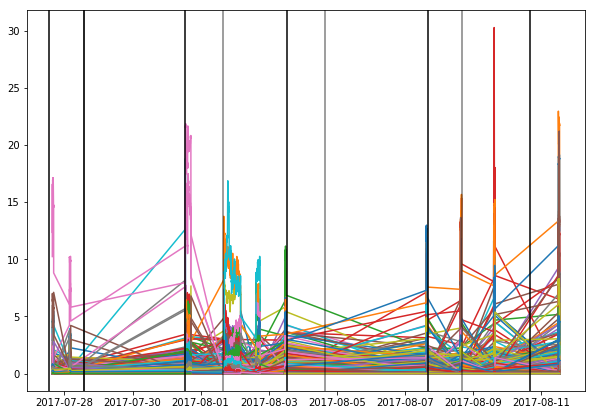

In [239]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table)
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

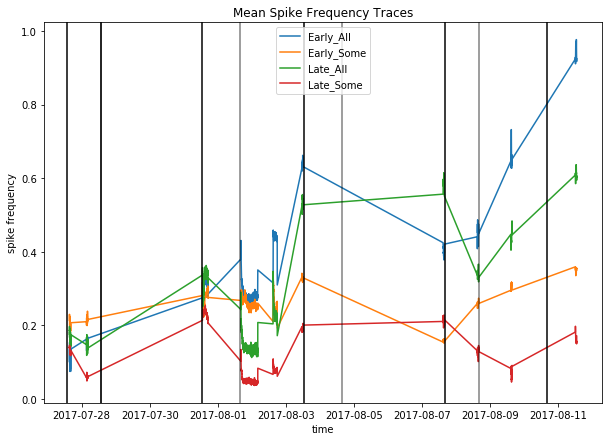

In [240]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table)
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

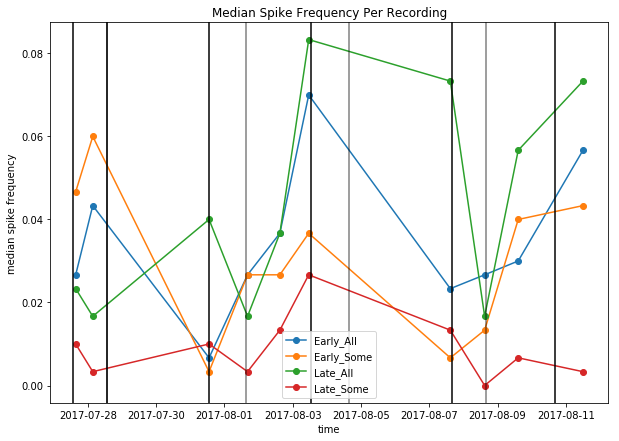

In [17]:
plt.figure(figsize=(10,7))
plotting.plot_medians_per_rec(cat_table, rec_starts, rec_ends, 11)
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

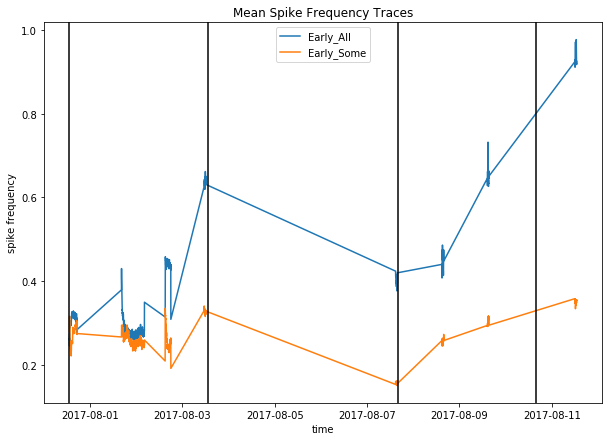

In [26]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table.query('time > "2017-07-30" and (condition == "Early_All" or condition == "Early_Some")'))
for x in early_media_changes[2:10]:
    plt.axvline(x, color = 'k')

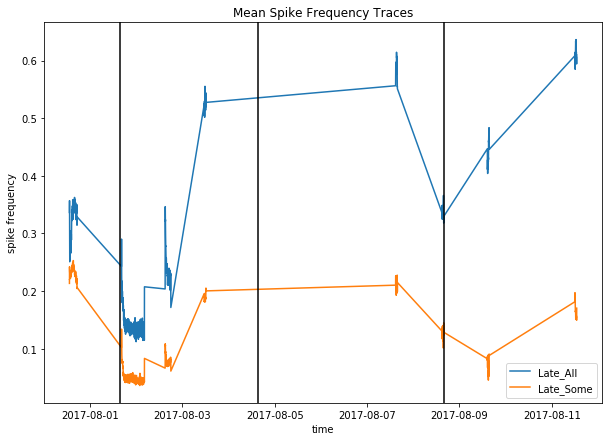

In [20]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table.query('time > "2017-07-30" and (condition == "Late_All" or condition == "Late_Some")'))
for x in late_media_changes[1:10]:
    plt.axvline(x, color = 'k')

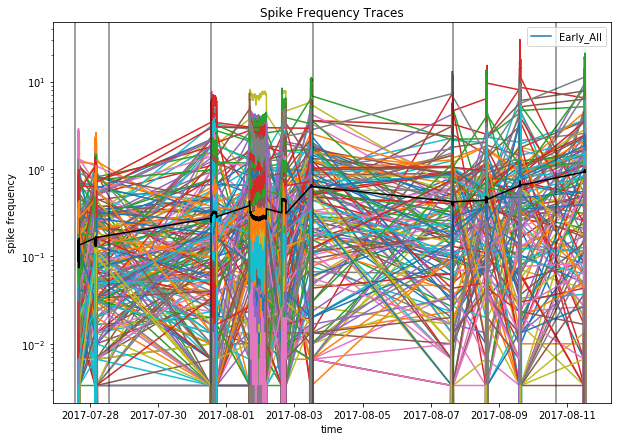

In [243]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces_plus_means(cat_table.query('condition == "Early_All"'))
for x in early_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

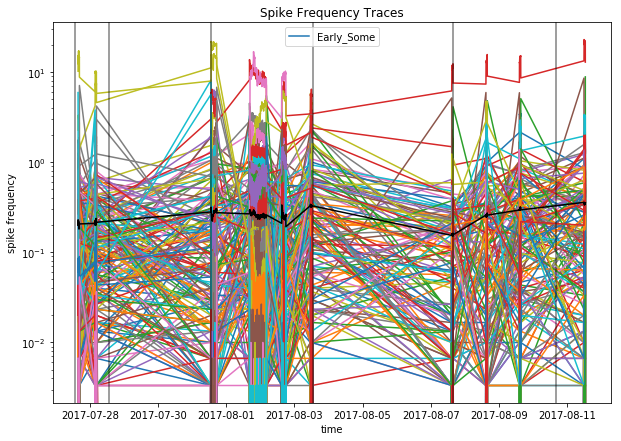

In [244]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces_plus_means(cat_table.query('condition == "Early_Some"'))
for x in early_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

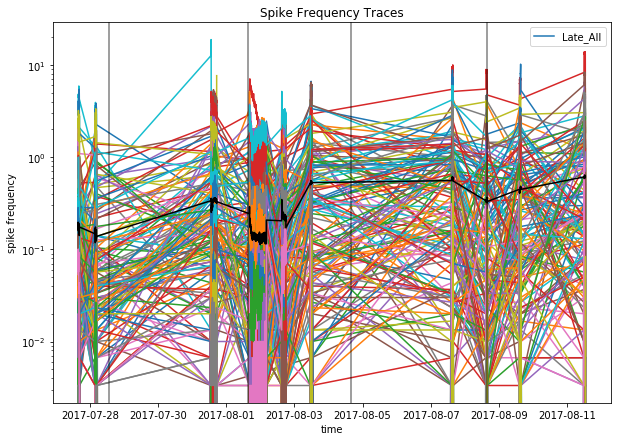

In [245]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces_plus_means(cat_table.query('condition == "Late_All"'))
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

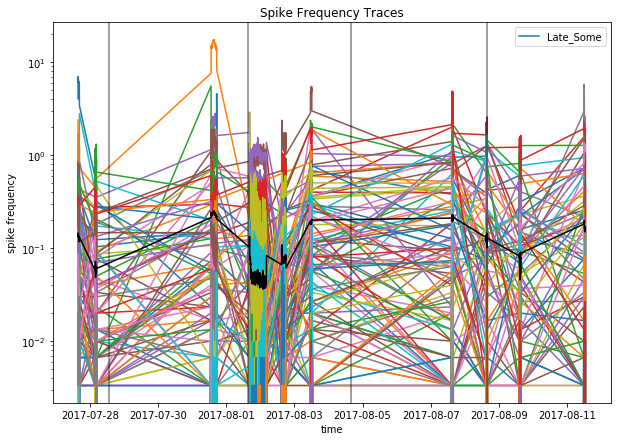

In [246]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces_plus_means(cat_table.query('condition == "Late_Some"'))
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

Repeat these plots using unsorted spikes (all neurons on each electrode grouped together):

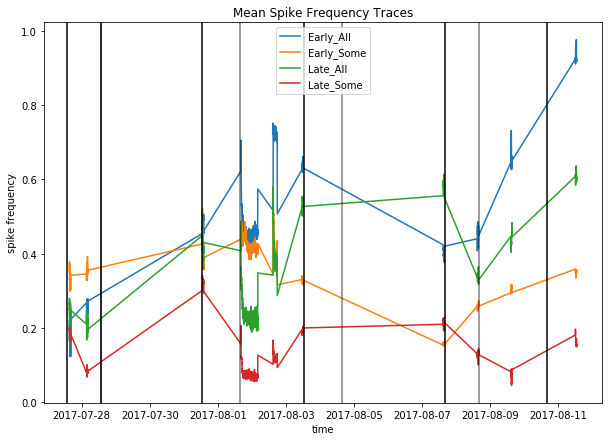

In [269]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table_nosort)
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

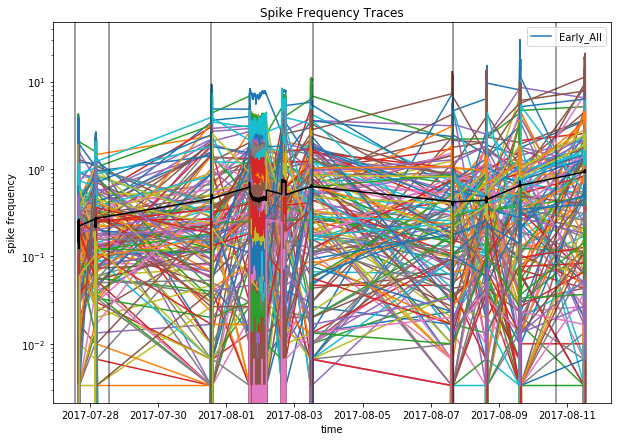

In [270]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces_plus_means(cat_table_nosort.query('condition == "Early_All"'))
for x in early_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

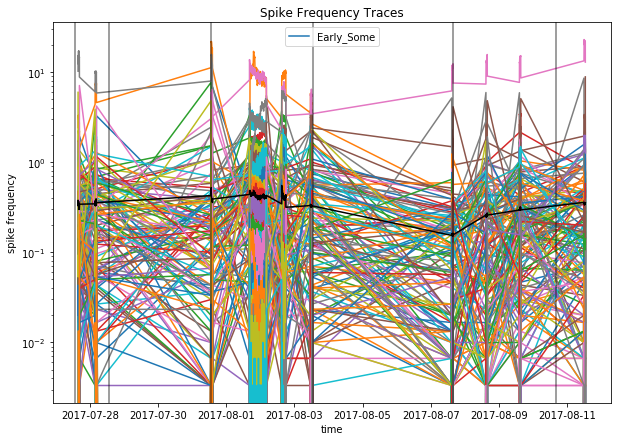

In [272]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces_plus_means(cat_table_nosort.query('condition == "Early_Some"'))
for x in early_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

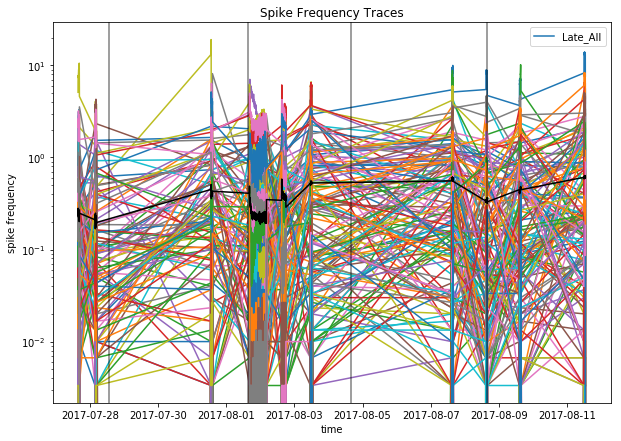

In [273]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces_plus_means(cat_table_nosort.query('condition == "Late_All"'))
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

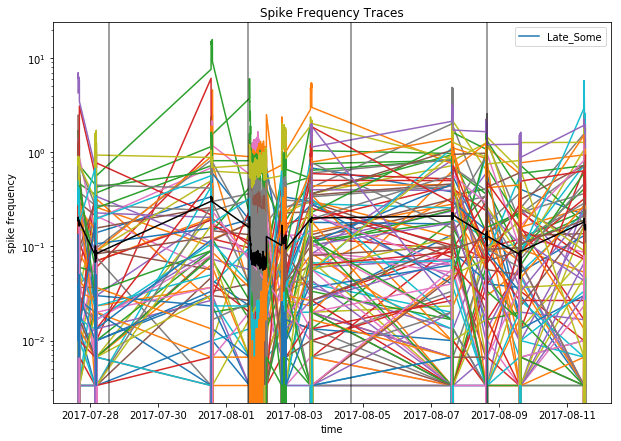

In [274]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces_plus_means(cat_table_nosort.query('condition == "Late_Some"'))
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

In [252]:
def count_active_neurons(cat_table, threshold, return_value):
    """Count the number of neurons firing above a threshold at each time point"""
    above_threshold = cat_table.query('spike_freq > @threshold')
    time_grouped_counts = above_threshold.groupby(('time'))['unit_name'].count()
    time_grouped_counts = time_grouped_counts.rename('count').reset_index() # Convert the multiindexed series back to a dataframe
    
    plt.figure(figsize=(10,7))
    plt.plot(time_grouped_counts['time'], time_grouped_counts['count'])
    plt.xlabel('time')
    plt.ylabel('Number of active units')
    plt.title('Active units')
    if return_value:
        return time_grouped_counts

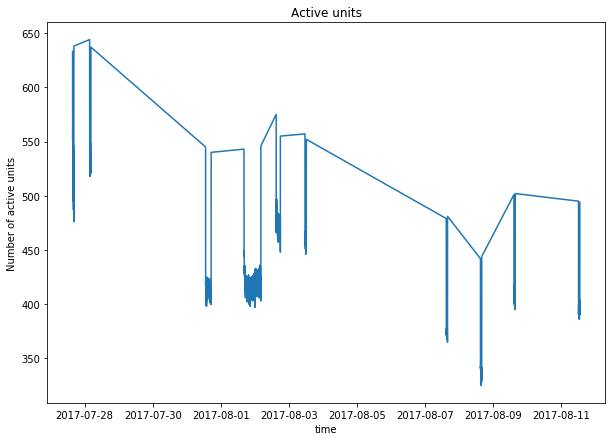

In [275]:
active_count = count_active_neurons(cat_table, 0.01)

plt.figure(figsize=(10,7))
plt.plot(active_count['time'], active_count['count'])
plt.xlabel('time')
plt.ylabel('Number of active units')
plt.title('Active units')

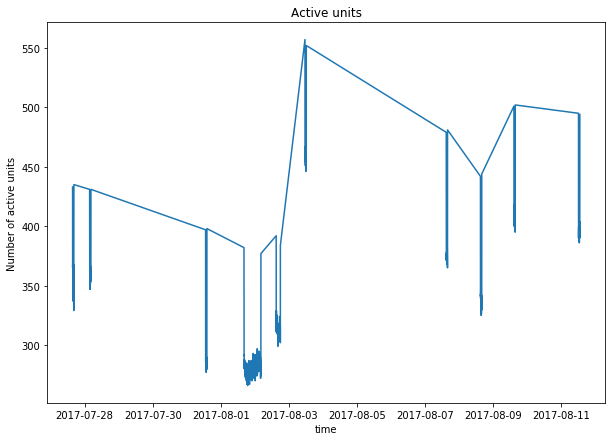

In [276]:
active_count_nosort = count_active_neurons(cat_table_nosort, 0.01)

plt.figure(figsize=(10,7))
plt.plot(active_count_nosort['time'], active_count_nosort['count'])
plt.xlabel('time')
plt.ylabel('Number of active units')
plt.title('Active units')

In [115]:
def compare_active_per_recording(cat_table, threshold, rec_starts, rec_ends):
    """For each recording session, find the number of new neurons and the 
    number of neurons that have stopped firing"""
    above_threshold = cat_table.query('spike_freq > @threshold')
    num_rec = len(rec_starts)
    only_1 = [0]*(num_rec-1);
    only_2 = [0]*(num_rec-1);
    for index in range(0,num_rec-1):
        start1 = rec_starts[index]
        end1 = rec_ends[index]
        start2 = rec_starts[index+1]
        end2 = rec_ends[index+1]
        group_1 = above_threshold.query('time >= @start1 and time <= @end1')
        group_2 = above_threshold.query('time >= @start2 and time <= @end2')
        units_1 = group_1['unit_name'].unique()
        units_2 = group_2['unit_name'].unique()
        both = list(set(units_1) | set(units_2))
        only_1[index] = len(both) - len(units_2) #Count the number of units in group1 but not group2
        only_2[index] = len(both) - len(units_1) 
    
    return (only_1, only_2)

In [1]:
[died, born] = compare_active_per_recording(cat_table, 0.01, rec_starts, rec_ends)
recs = range(1,11)
d=plt.plot(recs, born, label = "new")
b=plt.plot(recs, died, label = "died")
plt.legend()
plt.xlabel('Recording session')
plt.ylabel('Number of units')
plt.title('Neuron turnover')

NameError: name 'compare_active_per_recording' is not defined

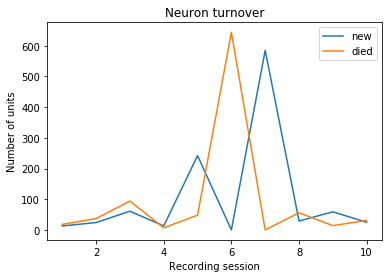

In [279]:
[died, born] = compare_active_per_recording(cat_table_nosort, 0.01, rec_starts, rec_ends)
recs = range(1,11)
d=plt.plot(recs, born, label = "new")
b=plt.plot(recs, died, label = "died")
plt.legend()
plt.xlabel('Recording session')
plt.ylabel('Number of units')
plt.title('Neuron turnover')

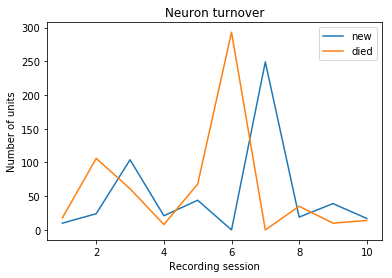

In [118]:
[died, born] = compare_active_per_recording(cat_table.query('condition == "Late_Some" or condition == "Early_Some"'), 0.01, rec_starts, rec_ends)
recs = range(1,11)
d=plt.plot(recs, born, label = "new")
b=plt.plot(recs, died, label = "died")
plt.legend()
plt.xlabel('Recording session')
plt.ylabel('Number of units')
plt.title('Neuron turnover')

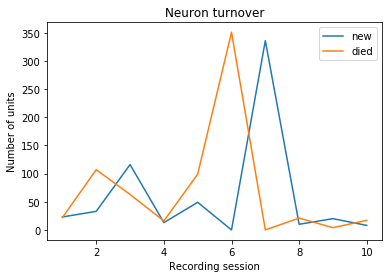

In [119]:
[died, born] = compare_active_per_recording(cat_table.query('condition == "Late_All" or condition == "Early_All"'), 0.01, rec_starts, rec_ends)
recs = range(1,11)
d=plt.plot(recs, born, label = "new")
b=plt.plot(recs, died, label = "died")
plt.legend()
plt.xlabel('Recording session')
plt.ylabel('Number of units')
plt.title('Neuron turnover')

In [17]:
def plot_dist_from_mean(category_dataframe, condition, **plot_kwargs):
    mean_freq_traces = category_dataframe.groupby(('condition', 'time'))['spike_freq'].mean()
    mean_freq_traces = mean_freq_traces.rename('spike frequency').reset_index() # Convert the multiindexed series back to a dataframe
    for unit in category_dataframe.query('condition == @condition')['unit_name'].unique():
        unit_table = category_dataframe.query('unit_name == @unit')
        unit_table = unit_table.reset_index()
        cond_mean = mean_freq_traces.query('condition == @condition').iloc[0:len(unit_table['spike_freq'])]
        cond_mean = cond_mean.reset_index()
        dist = ((unit_table['spike_freq'] - cond_mean['spike frequency'])/cond_mean['spike frequency'])*100
        plt.plot(unit_table['time'], dist, **plot_kwargs)
    plt.yscale('log')
    plt.title(condition)
    plt.xlabel('time')
    plt.ylabel('Distance from mean (as % of mean)')

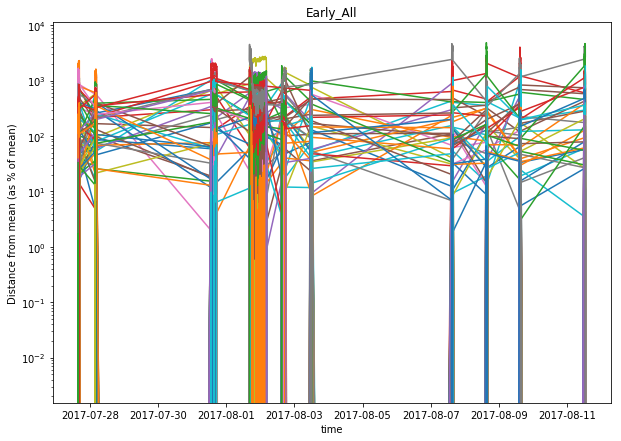

In [18]:
plt.figure(figsize=(10,7))
plot_dist_from_mean(cat_table, "Early_All")

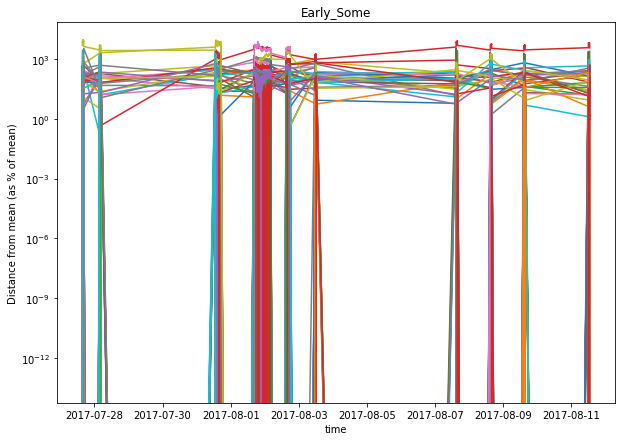

In [19]:
plt.figure(figsize=(10,7))
plot_dist_from_mean(cat_table, "Early_Some")

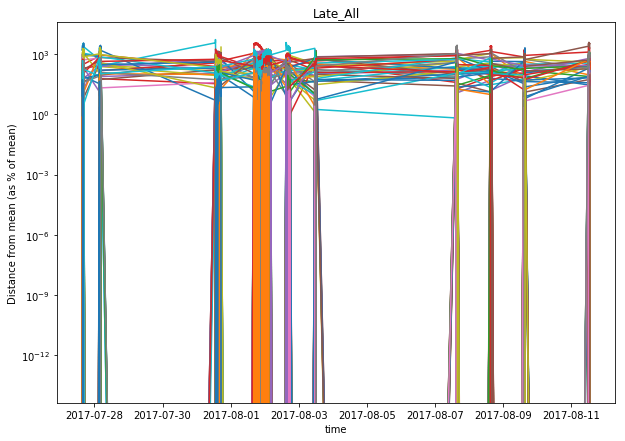

In [20]:
plt.figure(figsize=(10,7))
plot_dist_from_mean(cat_table, "Late_All")

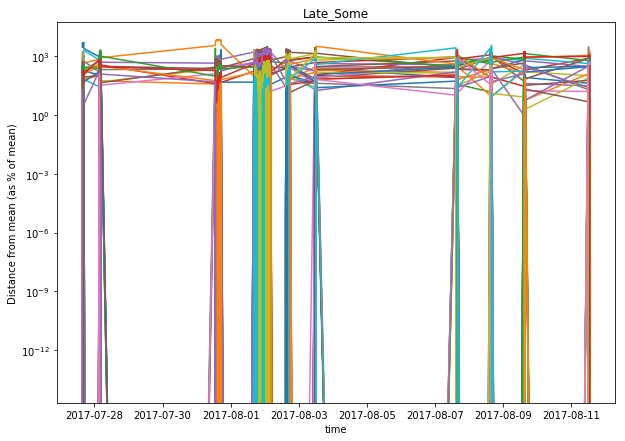

In [21]:
plt.figure(figsize=(10,7))
plot_dist_from_mean(cat_table, "Late_Some")

In [370]:
def var_dist_from_mean_hist(category_dataframe, condition):
    mean_freq_traces = category_dataframe.groupby(('condition', 'time'))['spike_freq'].mean()
    mean_freq_traces = mean_freq_traces.rename('spike frequency').reset_index() # Convert the multiindexed series back to a dataframe
    var = []
    for unit in category_dataframe.query('condition == @condition')['unit_name'].unique():
        unit_table = category_dataframe.query('unit_name == @unit')
        unit_table = unit_table.reset_index()
        cond_mean = mean_freq_traces.query('condition == @condition').iloc[0:len(unit_table['spike_freq'])]
        cond_mean = cond_mean.reset_index()
        dist = unit_table['spike_freq'] - cond_mean['spike frequency']
        if abs((max(dist) - min(dist))/np.mean(dist)) < 100:
            var = np.append(var, ((max(dist) - min(dist))/np.mean(dist)))
    plt.hist(var, bins = 50)
    plt.title(condition)

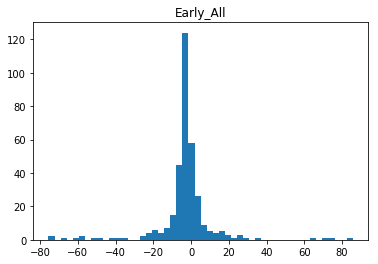

In [364]:
var_dist_from_mean_hist(cat_table, "Early_All")

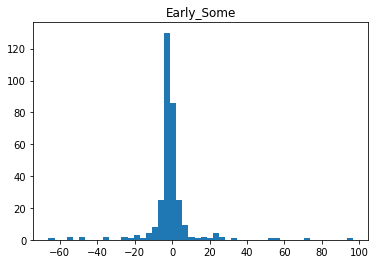

In [371]:
var_dist_from_mean_hist(cat_table, "Early_Some")

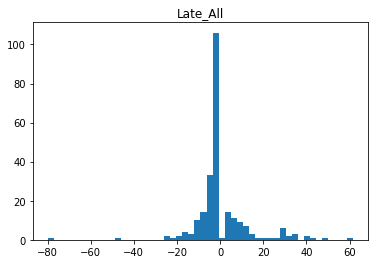

In [372]:
var_dist_from_mean_hist(cat_table, "Late_All")

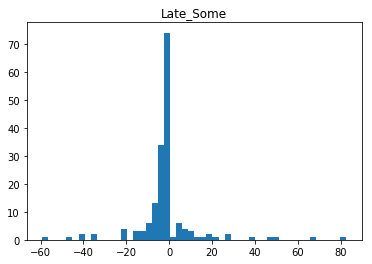

In [373]:
var_dist_from_mean_hist(cat_table, "Late_Some")

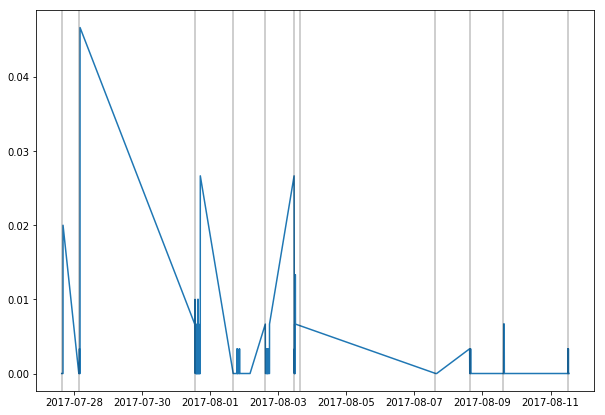

In [36]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name == "A1111"'))
for x in rec_starts:
    plt.axvline(x, color = 'k', alpha = 0.25)

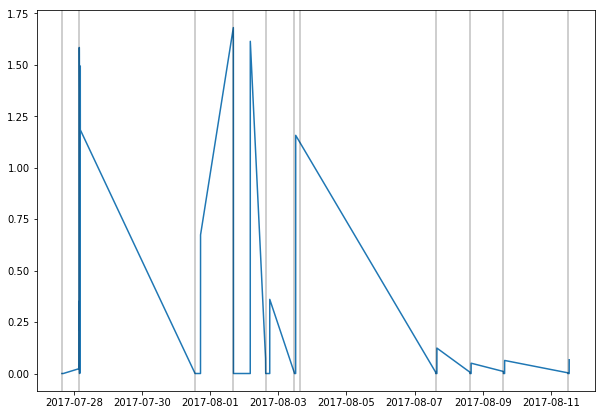

In [37]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name == "B3111"'))
for x in rec_starts:
    plt.axvline(x, color = 'k', alpha = 0.25)

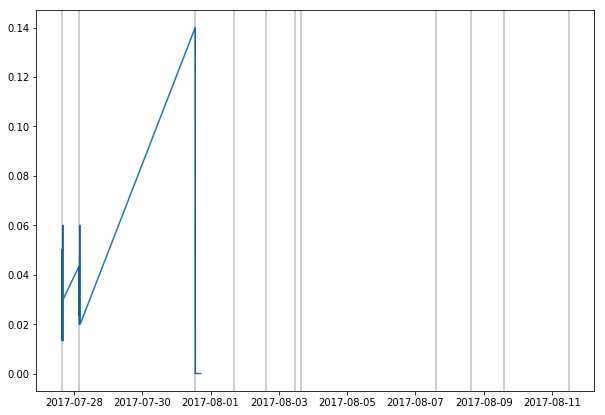

In [39]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name == "C2111"'))
for x in rec_starts:
    plt.axvline(x, color = 'k', alpha = 0.25)

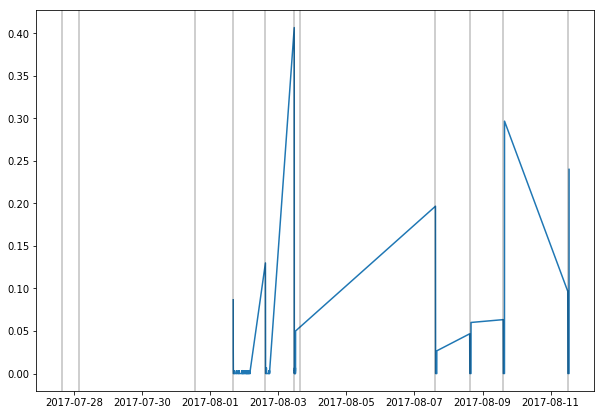

In [44]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name == "C7111"'))
for x in rec_starts:
    plt.axvline(x, color = 'k', alpha = 0.25)

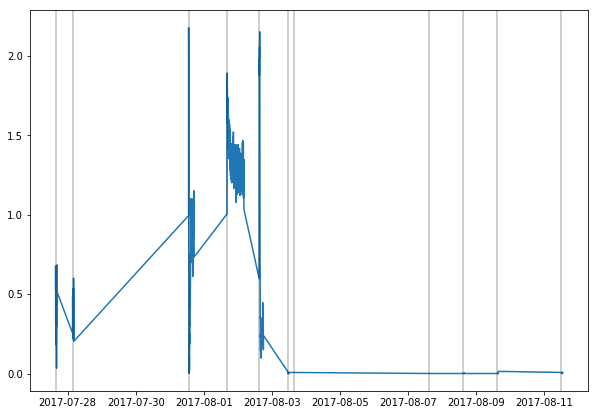

In [48]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name == "D3111"'))
for x in rec_starts:
    plt.axvline(x, color = 'k', alpha = 0.25)

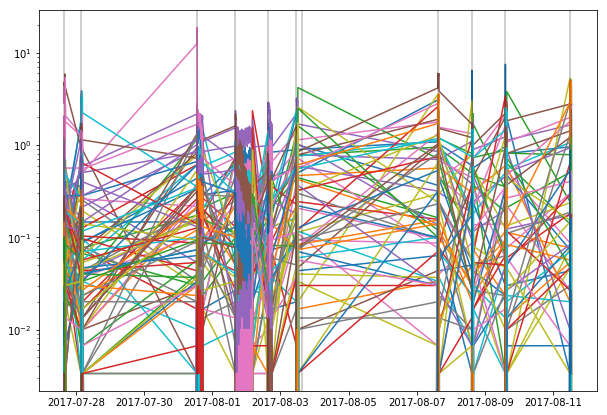

In [76]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name < "B1111" and unit_name > "A3111"'))
plt.yscale('log')
for x in rec_starts:
    plt.axvline(x, color = 'k', alpha = 0.25)

In [9]:
def plot_unit_means_per_rec(category_dataframe, rec_starts, rec_ends, num_rec, **plot_kwargs):
        mean_unit_freq = pd.DataFrame()
        for index in range(0,num_rec):
            start1 = rec_starts[index]
            end1 = rec_ends[index]
            rec_table = category_dataframe.query('time >= @start1 and time <= @end1')
            rec_mean_unit_freq = rec_table.groupby('unit_name')['spike_freq'].mean()
            num_units = rec_mean_unit_freq.count()
            start_dt = datetime.strptime(start1, "%Y-%m-%d %H:%M:%S").date()
            start_times = pd.Series([start1]*num_units, index = rec_mean_unit_freq.index)
            rec_data = pd.DataFrame({"mean_freq": rec_mean_unit_freq, "start_time": start_times})
            del rec_data.index.name
            rec_data.reset_index()
            rec_data['unit_name'] = rec_mean_unit_freq.index
            mean_unit_freq = pd.concat([mean_unit_freq, rec_data])
        
        for unit in mean_unit_freq['unit_name'].unique():
            date_table = mean_unit_freq.query('unit_name == @unit')
            plt.plot_date(date_table['start_time'], date_table['mean_freq'], '-o')
        
        plt.yscale('log')
        plt.xlabel('time')
        plt.ylabel('mean spike frequency')
        plt.title('Mean Spike Frequency Per Recording')

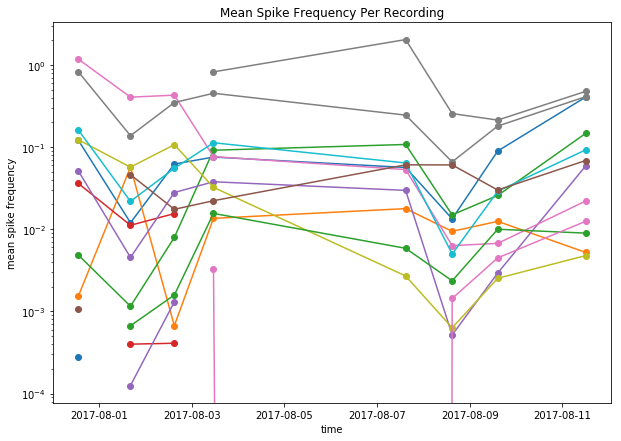

In [22]:
plt.figure(figsize=(10,7))
plot_unit_means_per_rec(cat_table.query('time > "2017-07-29" and unit_name >= "C7111" and unit_name < "C8111"'),rec_starts,rec_ends,11)

In [ ]:
plt.figure(figsize=(10,7))
t1 = rec_starts[28]
t2 = rec_ends[28]
t3 = rec_ends[31]
baseline_table = cat_table.query('time > @t1 and time < @t2')
stim_table = cat_table.query('time > @t2 and time < @t3')
cat_table2 = cat_table.query('time > @t1 and time < @t3')
plotting.foldInductionPlusMean(cat_table2, baseline_table, stim_table, "Early_All", '03', ind_filter = False, var = 2.5, minHz = 0.01, maxHz = 10000, ymax = 10)